In [1]:
# Import dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in analysis data
starting_df = pd.read_csv("foo.csv")
starting_df = starting_df.drop(["Unnamed: 0"],axis=1)
starting_df

,country,week,NO2,PM2.5,Date of Restrictions,Level,Week of Restrictions,Continent,Restrictions,Restriction Week Counter
0,Argentina,1,9.850000,79.013889,3/21/20,National,12,South America,No,NaN
1,Argentina,2,8.432540,65.119048,3/21/20,National,12,South America,No,NaN
2,Argentina,3,6.671429,27.416667,3/21/20,National,12,South America,No,NaN
3,Argentina,4,6.500000,23.750000,3/21/20,National,12,South America,No,NaN
4,Argentina,5,5.178571,26.083333,3/21/20,National,12,South America,No,NaN
...,...,...,...,...,...,...,...,...,...,...
567,Vietnam,9,13.809524,92.158730,3/31/20,National,14,Asia,No,NaN
568,Vietnam,10,12.873016,76.495238,3/31/20,National,14,Asia,No,NaN
569,Vietnam,11,12.873016,88.182540,3/31/20,National,14,Asia,No,NaN
570,Vietnam,12,9.492063,81.875661,3/31/20,National,14,Asia,No,NaN


In [3]:
# Grab data from the week before restrictions went into place for each country
init_df = starting_df[(starting_df.week == starting_df["Week of Restrictions"] - 1 )]

# Grab just the country names and pollution data
init_df = init_df[["country","week","NO2","PM2.5"]]

# Print the "initial" data
#init_df

# Grab data from the week restrictions went into place for each country
week_1_df = starting_df[(starting_df.week == starting_df["Week of Restrictions"])]

# Grab just the country names and pollution data
week_1_df = week_1_df[["country","week","NO2","PM2.5"]]

# Print the week 1 data
#week_1_df

# Grab data from the week after restrictions went into place for each country
week_2_df = starting_df[(starting_df.week == starting_df["Week of Restrictions"] + 1)]

# Grab just the country names and pollution data
week_2_df = week_2_df[["country","week","NO2","PM2.5"]]

# Print the week 2 data
#week_2_df

# Grab data from two weeks after restrictions went into place for each country
week_3_df = starting_df[(starting_df.week == starting_df["Week of Restrictions"] + 2)]

# Grab just the country names and pollution data
week_3_df = week_3_df[["country","week","NO2","PM2.5"]]

# Print the week 3 data
#week_3_df

,country,week,NO2,PM2.5
83,China,6,11.776190,105.200000
129,Denmark,13,11.400000,43.600000
230,Iran,10,33.380952,75.017857
271,Italy,12,19.238095,75.464286
284,Japan,12,19.021429,47.178571
311,Kuwait,13,25.400000,63.133333
337,Netherlands,13,10.425000,50.266667
389,Poland,13,10.100000,71.800000
462,South Korea,8,31.125000,88.553571
480,Spain,13,7.237500,29.750000


In [4]:
week_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 11 to 557
Data columns (total 4 columns):
country    42 non-null object
week       42 non-null int64
NO2        40 non-null float64
PM2.5      39 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


In [5]:
# Create series holding just the initial NO2 and PM2.5 data and drop null values
init_NO2 = init_df.dropna()["NO2"]
init_PM25 = init_df.dropna()["PM2.5"]

# Create series holding just the week 1 NO2 and PM2.5 data and drop null values
week_1_NO2 = week_1_df.dropna()["NO2"]
week_1_PM25 = week_1_df.dropna()["PM2.5"]

# Create series holding just the week 2 NO2 and PM2.5 data and drop null values
week_2_NO2 = week_2_df.dropna()["NO2"]
week_2_PM25 = week_2_df.dropna()["PM2.5"]

# Create series holding just the week 3 NO2 and PM2.5 data and drop null values
week_3_NO2 = week_3_df.dropna()["NO2"]
week_3_PM25 = week_3_df.dropna()["PM2.5"]

In [6]:
# Uncomment as desired to print series
#init_NO2
#init_PM25
#week_1_NO2
#week_1_PM25
#week_2_NO2
#week_2_PM25
#week_3_NO2
#week_3_PM25

In [7]:
# Quantitatively determine initial NO2 outliers
init_NO2_quartiles = init_NO2.quantile([.25,.5,.75])
init_NO2_lowerq = init_NO2_quartiles[0.25]
init_NO2_upperq = init_NO2_quartiles[0.75]
init_NO2_iqr = init_NO2_upperq-init_NO2_lowerq
init_NO2_lower_bound = init_NO2_lowerq - (1.5*init_NO2_iqr)
init_NO2_upper_bound = init_NO2_upperq + (1.5*init_NO2_iqr)

# Quantitatively determine week 1 NO2 outliers
week_1_NO2_quartiles = week_1_NO2.quantile([.25,.5,.75])
week_1_NO2_lowerq = week_1_NO2_quartiles[0.25]
week_1_NO2_upperq = week_1_NO2_quartiles[0.75]
week_1_NO2_iqr = week_1_NO2_upperq-week_1_NO2_lowerq
week_1_NO2_lower_bound = week_1_NO2_lowerq - (1.5*week_1_NO2_iqr)
week_1_NO2_upper_bound = week_1_NO2_upperq + (1.5*week_1_NO2_iqr)

# Quantitatively determine week 2 NO2 outliers
week_2_NO2_quartiles = week_2_NO2.quantile([.25,.5,.75])
week_2_NO2_lowerq = week_2_NO2_quartiles[0.25]
week_2_NO2_upperq = week_2_NO2_quartiles[0.75]
week_2_NO2_iqr = week_2_NO2_upperq-week_2_NO2_lowerq
week_2_NO2_lower_bound = week_2_NO2_lowerq - (1.5*week_2_NO2_iqr)
week_2_NO2_upper_bound = week_2_NO2_upperq + (1.5*week_2_NO2_iqr)

# Quantitatively determine week 3 NO2 outliers
week_3_NO2_quartiles = week_3_NO2.quantile([.25,.5,.75])
week_3_NO2_lowerq = week_3_NO2_quartiles[0.25]
week_3_NO2_upperq = week_3_NO2_quartiles[0.75]
week_3_NO2_iqr = week_3_NO2_upperq-week_3_NO2_lowerq
week_3_NO2_lower_bound = week_3_NO2_lowerq - (1.5*week_3_NO2_iqr)
week_3_NO2_upper_bound = week_3_NO2_upperq + (1.5*week_3_NO2_iqr)

<IPython.core.display.Javascript object>


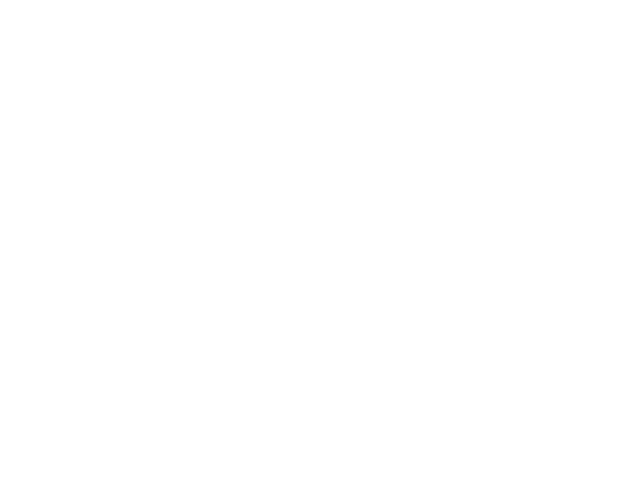

In [8]:
# Generate a box plot of the NO2 values before and three weeks after restrictions
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([init_NO2,week_1_NO2,week_2_NO2,week_3_NO2],labels=["Initial Value","Week 1","Week 2","Week 3"],flierprops=orange_out)
plt.ylabel('NO2')
plt.title("Values of NO2 Pollution Before and Three Weeks Into COVID Restrictions")
plt.tight_layout()
plt.savefig('plot_NO2.png')
plt.close()

In [9]:
# Quantitatively determine initial PM25 outliers
init_PM25_quartiles = init_PM25.quantile([.25,.5,.75])
init_PM25_lowerq = init_PM25_quartiles[0.25]
init_PM25_upperq = init_PM25_quartiles[0.75]
init_PM25_iqr = init_PM25_upperq-init_PM25_lowerq
init_PM25_lower_bound = init_PM25_lowerq - (1.5*init_PM25_iqr)
init_PM25_upper_bound = init_PM25_upperq + (1.5*init_PM25_iqr)

# Quantitatively determine week 1 PM25 outliers
week_1_PM25_quartiles = week_1_PM25.quantile([.25,.5,.75])
week_1_PM25_lowerq = week_1_PM25_quartiles[0.25]
week_1_PM25_upperq = week_1_PM25_quartiles[0.75]
week_1_PM25_iqr = week_1_PM25_upperq-week_1_PM25_lowerq
week_1_PM25_lower_bound = week_1_PM25_lowerq - (1.5*week_1_PM25_iqr)
week_1_PM25_upper_bound = week_1_PM25_upperq + (1.5*week_1_PM25_iqr)

# Quantitatively determine week 2 PM25 outliers
week_2_PM25_quartiles = week_2_PM25.quantile([.25,.5,.75])
week_2_PM25_lowerq = week_2_PM25_quartiles[0.25]
week_2_PM25_upperq = week_2_PM25_quartiles[0.75]
week_2_PM25_iqr = week_2_PM25_upperq-week_2_PM25_lowerq
week_2_PM25_lower_bound = week_2_PM25_lowerq - (1.5*week_2_PM25_iqr)
week_2_PM25_upper_bound = week_2_PM25_upperq + (1.5*week_2_PM25_iqr)

# Quantitatively determine week 3 PM25 outliers
week_3_PM25_quartiles = week_3_PM25.quantile([.25,.5,.75])
week_3_PM25_lowerq = week_3_PM25_quartiles[0.25]
week_3_PM25_upperq = week_3_PM25_quartiles[0.75]
week_3_PM25_iqr = week_3_PM25_upperq-week_3_PM25_lowerq
week_3_PM25_lower_bound = week_3_PM25_lowerq - (1.5*week_3_PM25_iqr)
week_3_PM25_upper_bound = week_3_PM25_upperq + (1.5*week_3_PM25_iqr)


<IPython.core.display.Javascript object>


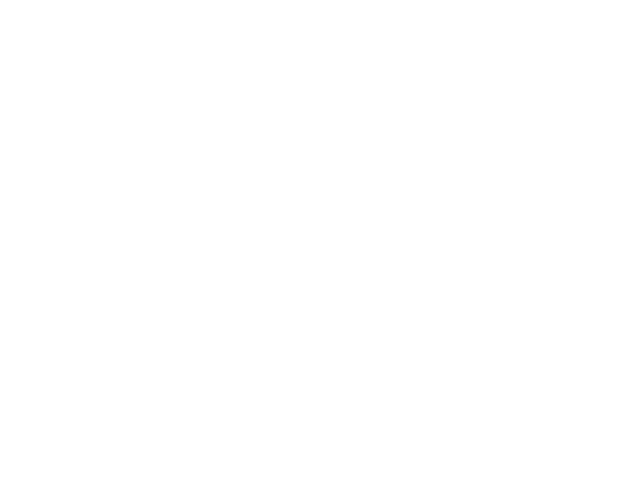

In [10]:
# Generate a box plot of the PM2.5 values before and three weeks after restrictions
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([init_PM25,week_1_PM25,week_2_PM25,week_3_PM25],labels=["Initial Value","Week 1","Week 2","Week 3"],flierprops=orange_out)
plt.ylabel('NO2')
plt.title("Values of PM2.5 Pollution Before and Three Weeks Into COVID Restrictions")
plt.tight_layout()
plt.savefig('plot_PM25.png')
plt.close()